In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
from shapely.geometry import  Point
from shapely import wkt
%matplotlib inline

### Pandas 3.0 New Update

In [18]:
pd.options.mode.copy_on_write = True 

**Given Data is from 2020 - 2024 for all Electric Vehicle over whole United States**

In [19]:
vehicle_df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

#### Creating a gpd also we don't have to extract the wkt_point formats as we need the data to be the vectorized format 

In [20]:
states_map = gpd.read_file('usa-states-census-2014.shp')

### Step 1 is understanding all the data , Finding Missing Values and drawing inferences 

In [21]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [22]:
vehicle_df['Make'].unique()

array(['TESLA', 'JEEP', 'BMW', 'TOYOTA', 'NISSAN', 'CHEVROLET', 'SMART',
       'KIA', 'FORD', 'LINCOLN', 'HYUNDAI', 'AUDI', 'VOLVO', 'FIAT',
       'MAZDA', 'VOLKSWAGEN', 'RIVIAN', 'HONDA', 'MITSUBISHI', 'POLESTAR',
       'CHRYSLER', 'MINI', 'JAGUAR', 'MERCEDES-BENZ', 'SUBARU',
       'CADILLAC', 'ALFA ROMEO', 'DODGE', 'LEXUS', 'PORSCHE', 'GENESIS',
       'LUCID', 'FISKER', 'LAND ROVER', 'GMC', 'ACURA', 'BENTLEY',
       'AZURE DYNAMICS', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'ROLLS-ROYCE',
       'RAM'], dtype=object)

In [23]:
vehicle_df.shape

(200048, 17)

In [24]:
vehicle_df['Model Year'].unique()

array([2019, 2023, 2020, 2018, 2022, 2012, 2011, 2015, 2016, 2014, 2021,
       2017, 2013, 2024, 2010, 2025, 2008, 2000, 2002, 1999, 2003, 1997])

In [25]:
vehicle_df['Model Year'].unique().max()

np.int64(2025)

In [26]:
vehicle_df['Model Year'].describe()

count    200048.000000
mean       2020.871261
std           2.994933
min        1997.000000
25%        2019.000000
50%        2022.000000
75%        2023.000000
max        2025.000000
Name: Model Year, dtype: float64

1. Note that the make year ranges from 1997 to 2025  For Electric Vehicle Data 

In [27]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

* Notice that the state of washington is common for all the vehicles 

*Analyzisng the Missing Values*

In [84]:
vehicle_df.isnull().sum()

pandas.core.series.Series

<Axes: title={'center': 'Null Values per Columns of Dataset'}, xlabel='Number of Null Values ', ylabel='Columns in Dataset'>

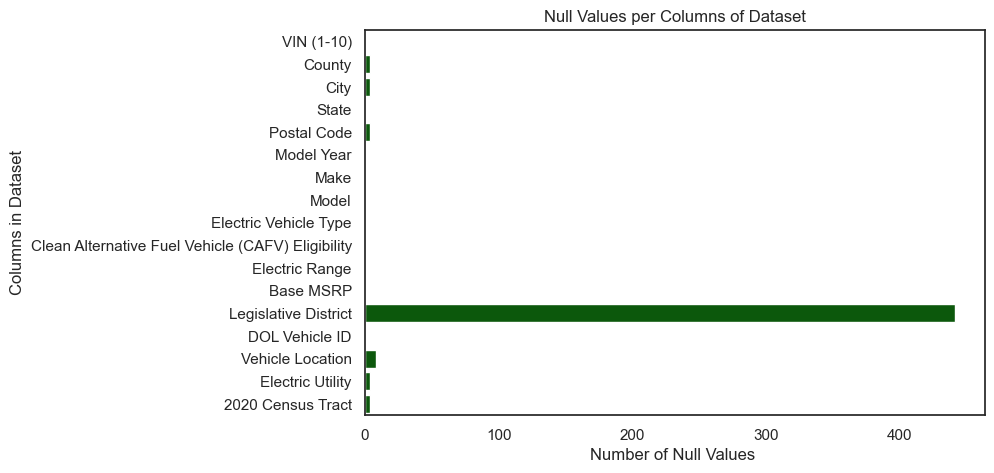

In [105]:
plt.figure(figsize=(8,5))
plt.title("Null Values per Columns of Dataset")
plt.xlabel("Number of Null Values ")
plt.ylabel("Columns in Dataset")
sns.barplot(x=vehicle_df.isnull().sum(),y=vehicle_df.columns,color='darkgreen')

* Apart from Legislative District all the Null Values are not significant to be dealt with 

In [ ]:
# Comparing the Null Values with Each Columns 

In [29]:
vehicle_df['Legislative District'].unique()

array([21., 15., 23., 26., 44., 36.,  2., 45., 22., 14., 47., 41.,  1.,
       10., 46., 48.,  5., 37., 33., 35., 32., 39., 38., 43., 13., 20.,
       34., 12., 40., 11., 30., 16., nan,  7.,  3.,  9., 42., 49., 18.,
       19., 17., 24., 31.,  8.,  4.,  6., 27., 25., 28., 29.])

In [30]:
vehicle_df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

1. It becomes really important to understand the importance of `CAFV` , `Electric Vehicle Type`

In [31]:
vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [32]:
vehicle_df['Electric Utility'].describe()

count                                            200044
unique                                               74
top       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq                                              73386
Name: Electric Utility, dtype: object

In [33]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [34]:
vehicle_df['Base MSRP'].unique()

array([     0,  69900,  44100,  53400,  31950,  64950,  59900,  34995,
        52900,  54950,  36800,  36900,  55700,  52650,  45600,  33950,
       110950,  81100,  39995, 184400,  32250,  91250,  43700,  98950,
        90700,  89100, 102000, 109000,  32995, 845000,  75095])

In [35]:
(vehicle_df['Base MSRP']>0).sum()

np.int64(3321)

In [36]:
vehicle_df['State'].unique()


array(['WA', 'AE', 'CO', 'AZ', 'UT', 'CA', 'MD', 'TX', 'NY', 'VA', 'ID',
       'GA', 'IL', 'MO', 'MI', 'NV', 'WI', 'AL', 'NC', 'SC', 'OR', 'NE',
       'PA', 'KY', 'DE', 'OH', 'HI', 'KS', 'FL', 'IN', 'BC', 'NM', 'IA',
       'LA', 'OK', 'DC', 'CT', 'NJ', 'WY', 'RI', 'MA', 'AR', 'AK', 'NH',
       'MN'], dtype=object)

**Note that there are total of 45 States in Datasets**
1. (-122.29943 47.912654): These are the latitude and longitude coordinates,
2. 5.306104e+10 2020 Census Tract likely refers to a specific 2020 Census Tract identified by a unique numerical code of 53,061,040,000. 

In [37]:
vehicle_df['2020 Census Tract'].unique().shape
# There are 2162 Unique Values Corresponding to the UNIQUE ID'S of 2020 census Tract 

(2162,)

In [38]:
# Creating Separate Data Set For Tesla 
tesla_df=pd.DataFrame(vehicle_df[vehicle_df['Make']=='TESLA'])

In [39]:
tesla_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJYGDEF8L,King,Seattle,WA,98107.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,36.0,112984833,POINT (-122.3788863 47.6702397),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
13,5YJ3E1EA3K,King,Auburn,WA,98092.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,47.0,180476327,POINT (-122.1550193 47.2884536),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
19,5YJ3E1EA4K,Snohomish,Everett,WA,98204.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,21.0,478330212,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
20,7SAYGAEE2P,King,Seattle,WA,98115.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,257782626,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [40]:
tesla_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

*Thus it can be concluded that almost all the Tesla are `CAFV` eligible*

<Axes: xlabel='Model', ylabel='Electric Range'>

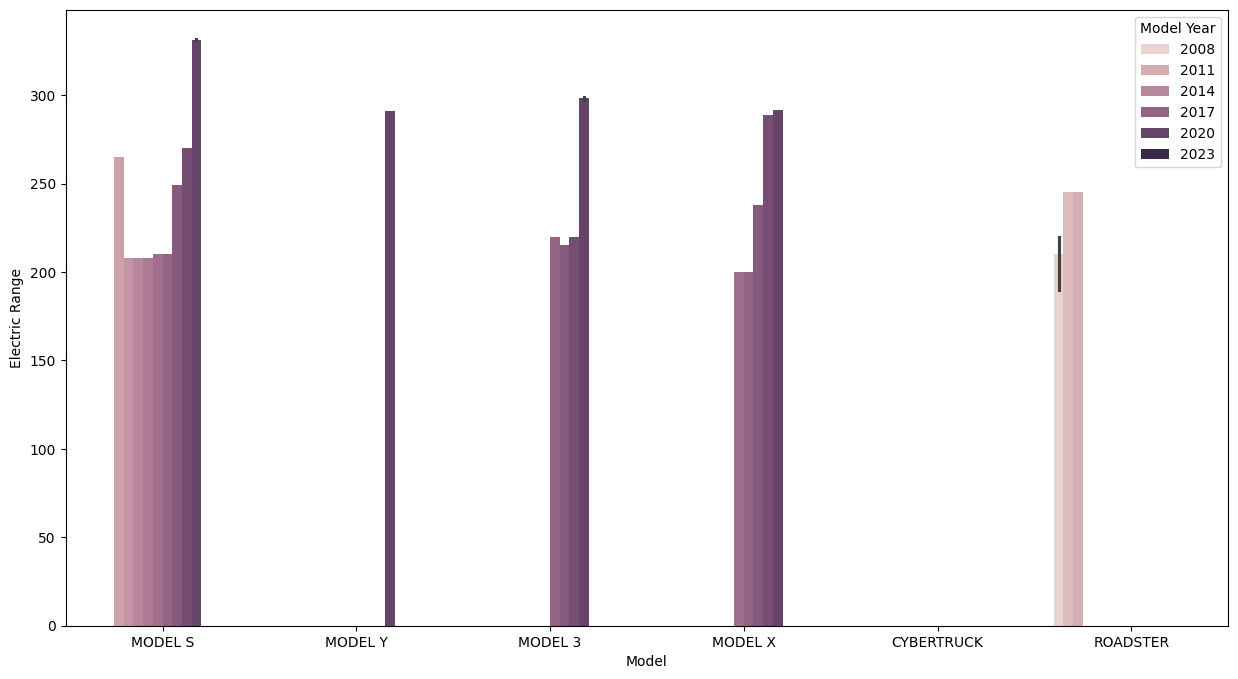

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=tesla_df)

 1. It is ClearlyVisible that the range of Each Model Imporves overtime 
 2. Cybertruck are not yet fully deleivered enough data is not available on them

In [42]:
tesla_df['Model']=='MODEL S'  # This returns the boolean Seires 

0          True
5         False
13        False
19        False
20        False
          ...  
200033    False
200036    False
200038    False
200041    False
200047    False
Name: Model, Length: 88083, dtype: bool

In [43]:
# Where as this returns 
# Data Frame Based on Filtering using the Boolean Series 
tesla_df[tesla_df['Model']=='MODEL S']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
59,5YJSA1DP8D,Snohomish,Stanwood,WA,98292.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,10.0,111162012,POINT (-122.326873 48.2144825),PUGET SOUND ENERGY INC,5.306105e+10
60,5YJSA1E29H,Thurston,Olympia,WA,98502.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,148198326,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
77,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,15.0,258112970,POINT (-120.5517376 46.6678647),PACIFICORP,5.307700e+10
109,5YJSA1E41J,Thurston,Olympia,WA,98502.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,22.0,193795542,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199930,5YJSA1DP8D,Pierce,Fife,WA,98424.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,25.0,164806771,POINT (-122.3538141 47.2365279),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
199957,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,10.0,198794410,POINT (-122.326873 48.2144825),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
199966,5YJSA1H11E,Pierce,Edgewood,WA,98371.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,31.0,306854019,POINT (-122.3119354 47.1990211),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305394e+10
199974,5YJSA1E5XN,Snohomish,Snohomish,WA,98290.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,219562703,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10


**Note that it is important to use `figsize` Attribute before implementing the graph**

### Results in Wrong Diagram due to wrong estimator 
`estimator=mean` by default

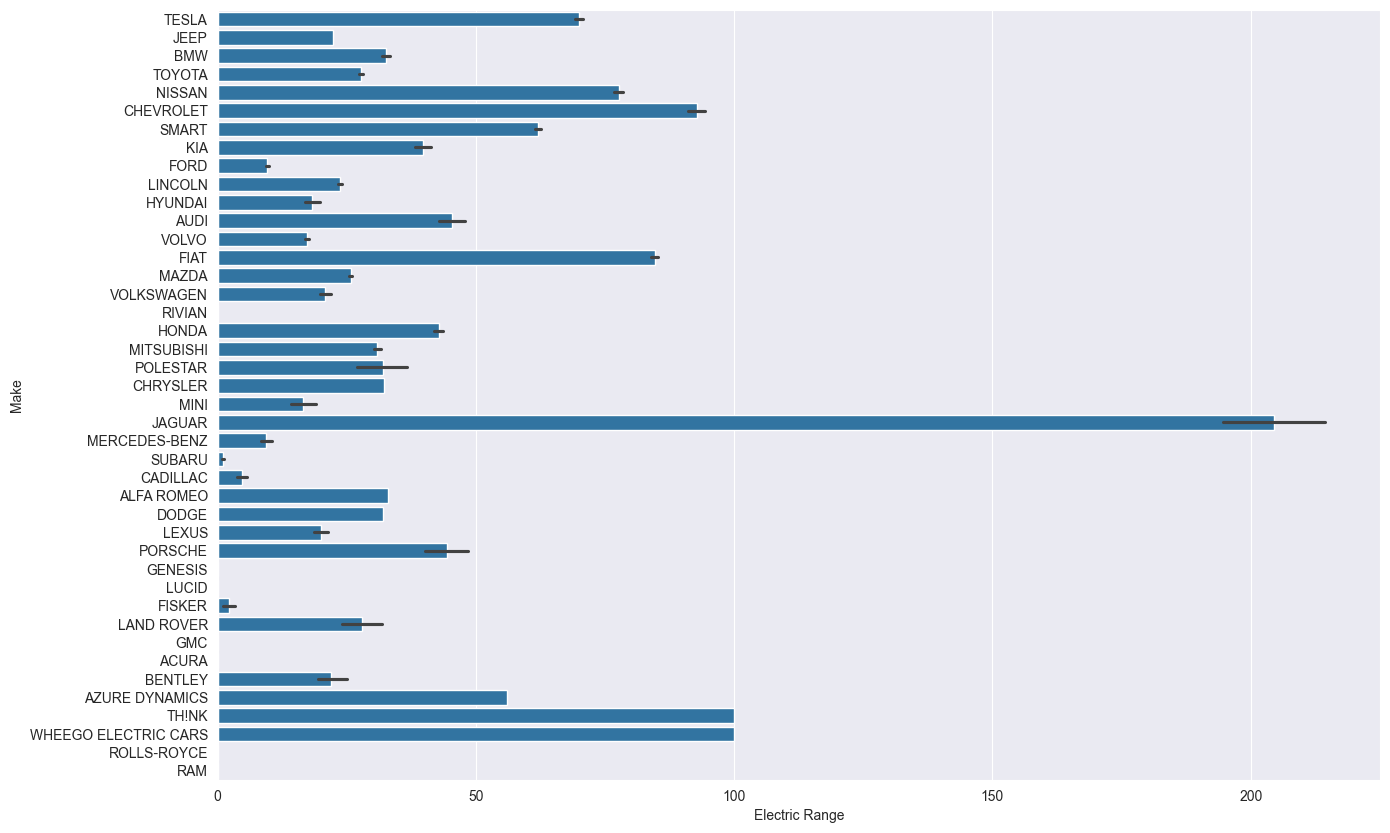

In [44]:
# We will comapre overall range using the makers for the whole data set 
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='Electric Range',y='Make',data=vehicle_df)
sns.set_theme()

In [45]:
# Let Check the Maximum Range in Whole Data-Set
vehicle_df[vehicle_df['Electric Range']==337]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1675,5YJSA1E41L,King,Bellevue,WA,98005.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,48.0,261155807,POINT (-122.167394 47.614119),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2968,5YJSA1E48L,Clark,Vancouver,WA,98683.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,17.0,231099067,POINT (-122.515805 45.604689),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4213,5YJSA1E41L,King,Auburn,WA,98001.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,47.0,143887173,POINT (-122.2651204 47.3164638),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9752,5YJSA1E4XL,Clark,Vancouver,WA,98664.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,49.0,124659167,POINT (-122.575383 45.620105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
10020,5YJSA1E42L,Snohomish,Mill Creek,WA,98012.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,44.0,104642107,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178557,5YJSA1E45L,Cowlitz,Woodland,WA,98674.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,20.0,4914794,POINT (-122.7050688 45.9237749),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10
182418,5YJSA1E41L,King,Carnation,WA,98014.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,5.0,123160026,POINT (-121.921987 47.65881),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
190000,5YJSA1E41L,Spokane,Spokane,WA,99223.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,6.0,132182620,POINT (-117.3600492 47.6077423),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
190539,5YJSA1E45L,Kitsap,Bainbridge Island,WA,98110.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,23.0,255449582,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10


**Although in the whole data set the maximum range is of the Tesla Model S However when we plot it the Maximum appears to be of Jaguar**

In [46]:
vehicle_df[vehicle_df['Make']=='TESLA'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,88081.000000,88083.000000,88083.000000,88083.000000,87860.000000,8.808300e+04,8.808100e+04
mean,98137.330991,2021.273730,69.933699,1221.034138,29.657375,2.256225e+08,5.296627e+10
std,2546.130245,2.377459,111.334139,9219.893538,15.391501,7.647297e+07,1.713178e+09
min,1731.000000,2008.000000,0.000000,0.000000,1.000000,2.462900e+04,1.081042e+09
25%,98037.000000,2020.000000,0.000000,0.000000,18.000000,1.865772e+08,5.303302e+10
50%,98109.000000,2022.000000,0.000000,0.000000,34.000000,2.329354e+08,5.303303e+10
75%,98332.000000,2023.000000,208.000000,0.000000,43.000000,2.603785e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,110950.000000,49.000000,4.791150e+08,5.602100e+10


In [47]:
vehicle_df[vehicle_df['Make']=='JAGUAR'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,238.000000,238.000000,238.000000,238.0,238.000000,2.380000e+02,2.380000e+02
mean,98272.252101,2019.840336,204.504202,0.0,27.966387,1.880207e+08,5.304090e+10
std,317.817749,1.208152,77.829726,0.0,15.040835,1.090996e+08,1.645835e+07
min,98001.000000,2019.000000,0.000000,0.0,1.000000,1.864432e+06,5.300501e+10
25%,98034.000000,2019.000000,234.000000,0.0,17.000000,1.158338e+08,5.303302e+10
50%,98155.000000,2020.000000,234.000000,0.0,31.000000,1.794346e+08,5.303303e+10
75%,98374.000000,2020.000000,234.000000,0.0,41.000000,2.571789e+08,5.305372e+10
max,99354.000000,2024.000000,234.000000,0.0,49.000000,4.775598e+08,5.307500e+10


### LEARNINGS :
1. Although we know that the maximum range is of Tesla Model s but due to many zero values in the tesla_df the mean comes out to be around `69`
2. Although Jaguar does not have max range due to less zero values in jaguar_df its mean is far more higher `214` 

Therefore using mean to plot the graph is not an appropriate quantity to measure such factor 

<Axes: xlabel='Electric Range', ylabel='Make'>

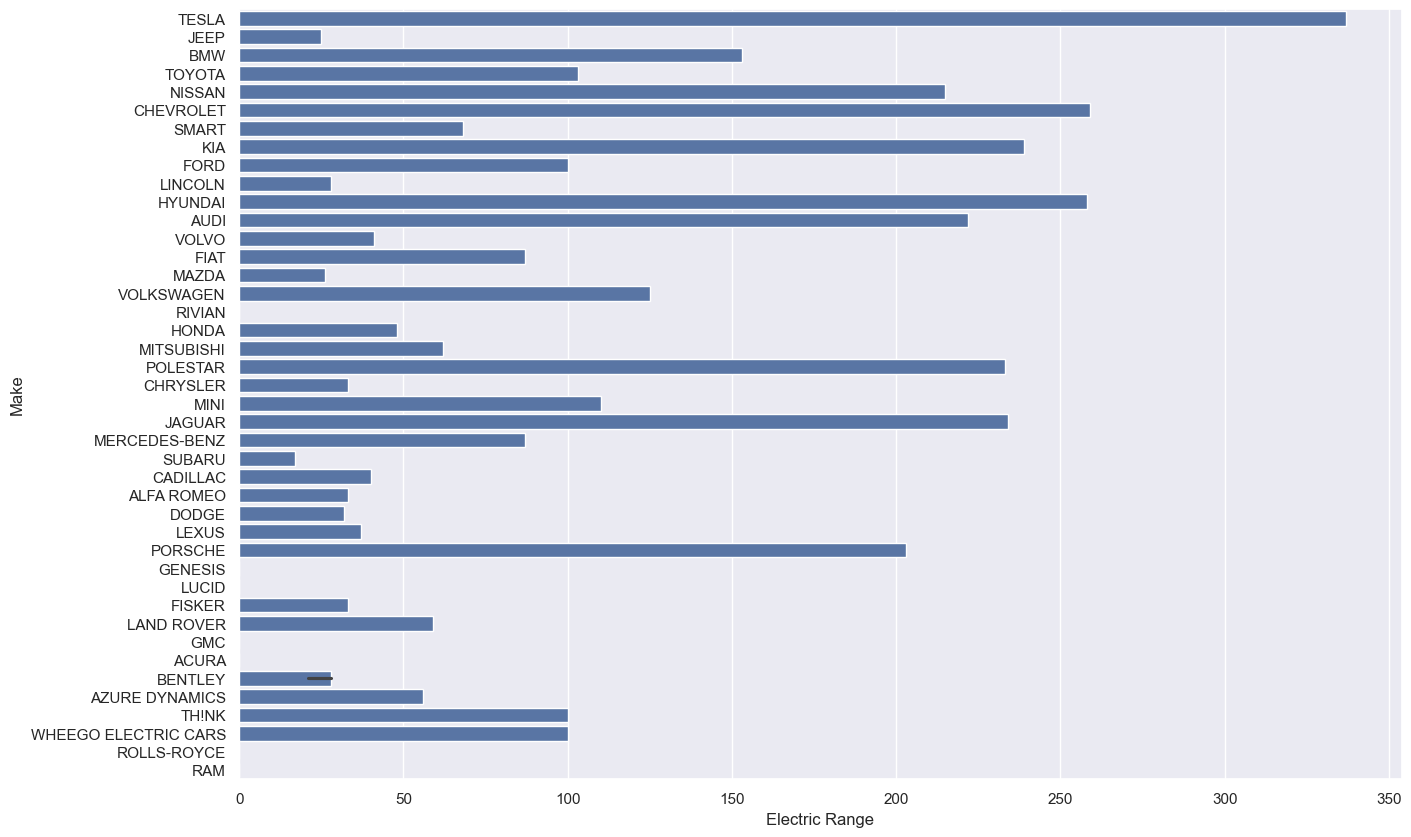

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='Electric Range',y='Make',data=vehicle_df,estimator=max)


**It is Clearly Visible that Using appropriate factors to calculate the parameters by using the and analysing the data set is very important**

<Axes: xlabel='Model', ylabel='Electric Range'>

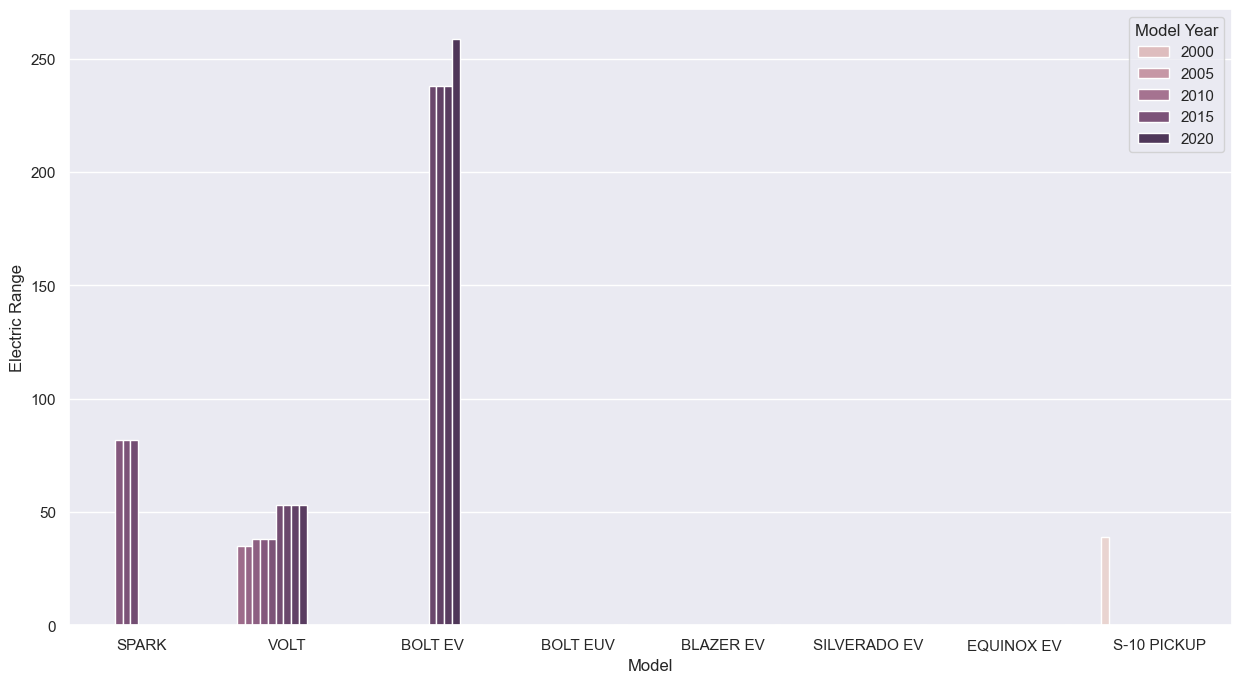

In [49]:
# Analysing the Second Best Car Provider in Electirc Range (Chevorlet)
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='CHEVROLET'])

<Axes: xlabel='Model', ylabel='Electric Range'>

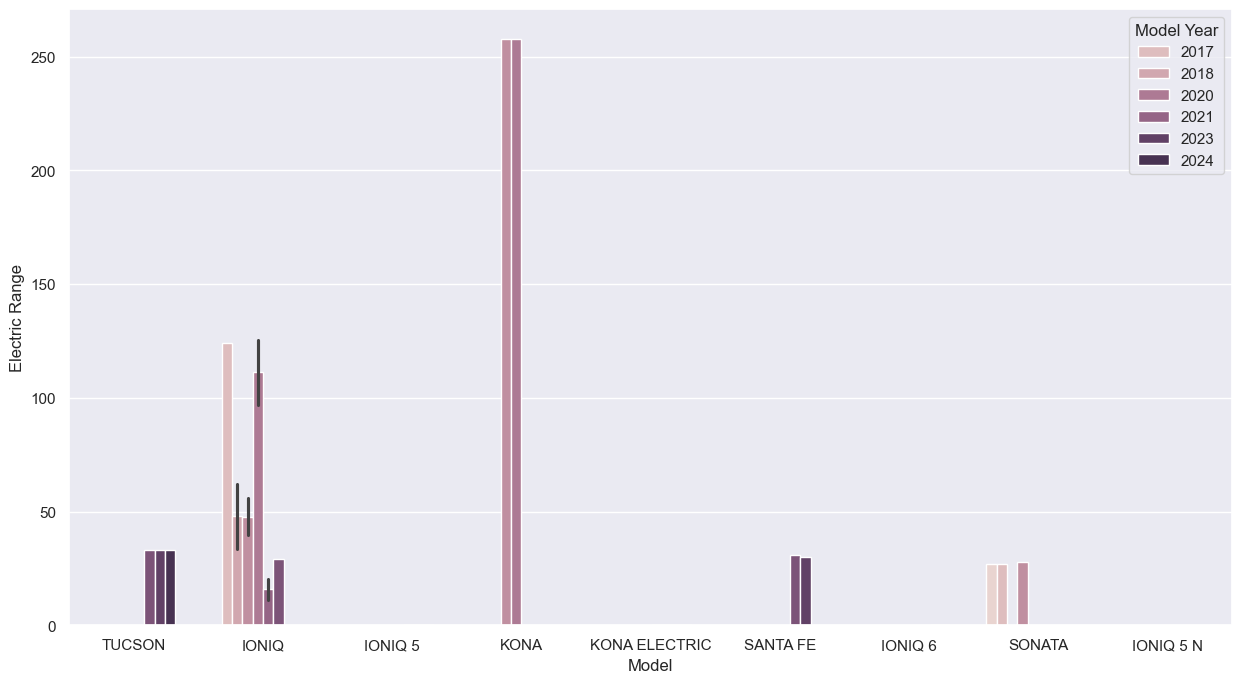

In [50]:
# Plotting the Same for Hyundai 
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='HYUNDAI'])

<Axes: xlabel='Model', ylabel='Electric Range'>

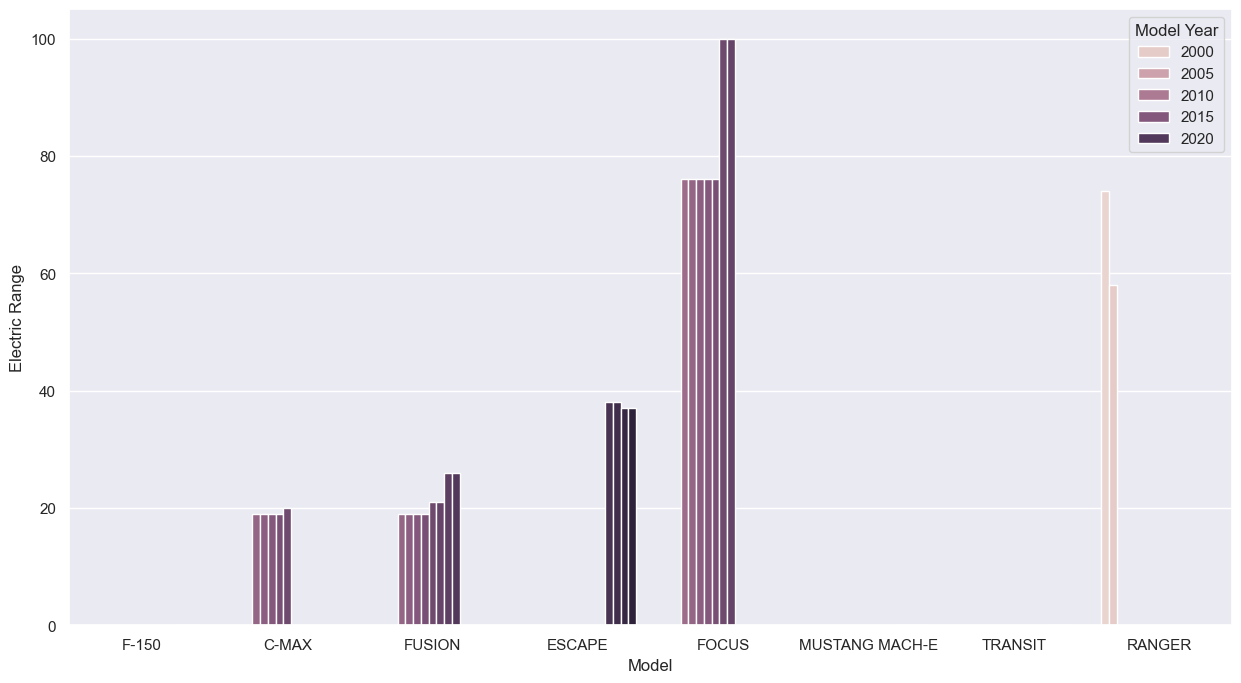

In [51]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='FORD'])

In [52]:
vehicle_df[vehicle_df['Make']=='FORD']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
15,1FTVW1EV4P,Snohomish,Mill Creek,WA,98012.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,224463865,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
21,1FADP5CU2G,Kitsap,Bainbridge Island,WA,98110.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,23.0,477705252,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
41,1FADP5CU0G,Kitsap,Kingston,WA,98346.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,23.0,1465033,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
50,3FA6P0SU2G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,35.0,198573294,POINT (-122.8733203 47.0133209),PUGET SOUND ENERGY INC,5.306701e+10
61,3FA6P0SU8L,Snohomish,Bothell,WA,98012.0,2020,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,1.0,150125713,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199976,3FMTK3SU3P,Clallam,Sequim,WA,98382.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,24.0,261797791,POINT (-123.1090862 48.0805816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
199978,3FMTK3SU2P,Whatcom,Lynden,WA,98264.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,259172392,POINT (-122.4537492 48.9425893),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
199981,1FADP5CU6G,Pierce,Tacoma,WA,98404.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,25.0,196380117,POINT (-122.414395 47.209008),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
200012,3FMTK3SU7N,Snohomish,Everett,WA,98208.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,38.0,206962472,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [53]:
vehicle_df[vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Eligibility unknown as battery range has not been researched'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109401.000000,109401.000000,109401.0,109401.0,109193.000000,1.094010e+05,1.094010e+05
mean,98169.708632,2022.666146,0.0,0.0,29.327255,2.328471e+08,5.298111e+10
std,2210.100752,0.915459,0.0,0.0,15.097224,3.379973e+07,1.547762e+09
min,1731.000000,2008.000000,0.0,0.0,1.000000,1.028289e+08,1.001020e+09
25%,98040.000000,2022.000000,0.0,0.0,18.000000,2.148814e+08,5.303301e+10
50%,98116.000000,2023.000000,0.0,0.0,33.000000,2.415949e+08,5.303303e+10
75%,98346.000000,2023.000000,0.0,0.0,43.000000,2.606348e+08,5.305307e+10
max,99577.000000,2025.000000,0.0,0.0,49.000000,3.453611e+08,5.602100e+10


It Becomes Important to notice that all the vehicle with zero range have not actually been researched yet 

## Adding Longitude and Latitude Points Using WKT Data  
*Using the `Shapely` Module to parse the WKT Points into Latitudes and Longitudes*


***From above we know that the vehicle location has some missing values hence we have to handle the missing values before plotting it***

In [54]:
# vehicle_df['Vehicle Location'].info()

**The below code is optimised such that when a `NaN` value is encountered it appends None Value to it else adds the point values to list** 

In [69]:
# POINT (-122.206146 47.839957)
# POINT (x,y) --> (long,latitude) point pairs 
longitudes =[]
latitudes =[]

location=vehicle_df['Vehicle Location'].to_list()
for wkt_point in location:
	if isinstance(wkt_point, str):
		point = wkt.loads(wkt_point)
		longitudes.append(point.x)
		latitudes.append(point.y)
	else:
		longitudes.append(None)
		latitudes.append(None)


In [70]:
longitudes[:10]

[-122.29943,
 -120.4688751,
 -122.5178351,
 -122.6530052,
 -122.2032349,
 -122.3788863,
 -122.6771414,
 -122.1925969,
 -122.1925969,
 -122.86491]

In [71]:
latitudes[:10]

[47.912654,
 46.6046178,
 47.7981436,
 47.4739066,
 47.8956271,
 47.6702397,
 46.8882415,
 47.676241,
 47.676241,
 47.07503]

#### Converting the vehicle to Geopandas Object so that it can be conviniently plotted

In [72]:
# We can use directly the WKT format or we can even pass the seperated longitude and latitude data 
#  as we have already created seprate columns lets add those 
gdf=gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes,latitudes))

**Plotting Basic Scatter plot without Boundaries in Seaborn and Matplotlib**

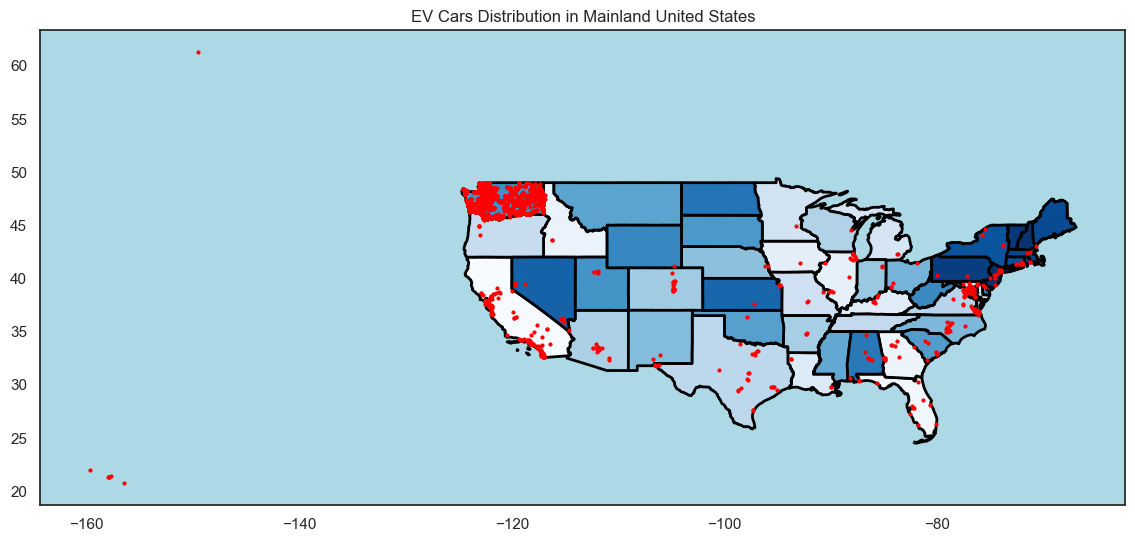

In [81]:
sns.set_style('white')
fig,ax =plt.subplots(figsize=(14,10))
plt.title("EV Cars Distribution in Mainland United States")
states_map.plot(ax=ax,edgecolor='black',linewidth=2,cmap='Blues')
gdf.plot(ax=ax,color='red',markersize=4)  # Marker attribute for type and markersize
ax.set_facecolor('lightblue')
plt.show()

In [ ]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [ ]:
# Using a barchart to check the difference between Vehicles in State of California 
vehicle_df['State'].describe()

count     200048
unique        45
top           WA
freq      199606
Name: State, dtype: object

In [ ]:
vehicle_df.duplicated().sum()
# There are no Duplicates in this Data Set

np.int64(0)

In [ ]:
vehicle_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200044.000000,200048.000000,200048.000000,200048.000000,199606.000000,2.000480e+05,2.000440e+05
mean,98176.178121,2020.871261,53.485279,947.551913,28.986063,2.262988e+08,5.297545e+10
std,2424.207811,2.994933,88.786301,7860.591091,14.908108,7.282433e+07,1.605628e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.363396e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,42.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [ ]:
vehicle_df[~(vehicle_df['State']=='WA')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 262 to 199385
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         442 non-null    object 
 1   County                                             438 non-null    object 
 2   City                                               438 non-null    object 
 3   State                                              442 non-null    object 
 4   Postal Code                                        438 non-null    float64
 5   Model Year                                         442 non-null    int64  
 6   Make                                               442 non-null    object 
 7   Model                                              442 non-null    object 
 8   Electric Vehicle Type                              442 non-null    object 
 9   Clean Alte

In [ ]:
vehicle_df['Electric Vehicle Type'].describe()

count                             200048
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                              156956
Name: Electric Vehicle Type, dtype: object

In [ ]:
vehicle_df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [ ]:
vehicle_df['Make'].describe()

count     200048
unique        42
top        TESLA
freq       88083
Name: Make, dtype: object

In [ ]:
vehicle_df[vehicle_df['State']=='WA']['Electric Utility'].describe()

count                                            199606
unique                                               73
top       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq                                              73386
Name: Electric Utility, dtype: object

In [ ]:
vehicle_df[vehicle_df['State']=='WA']['Electric Range'].value_counts()[:10]

Electric Range
0      109193
215      6443
32       4766
25       4386
21       4114
220      4026
238      4004
84       3876
42       2914
38       2509
Name: count, dtype: int64

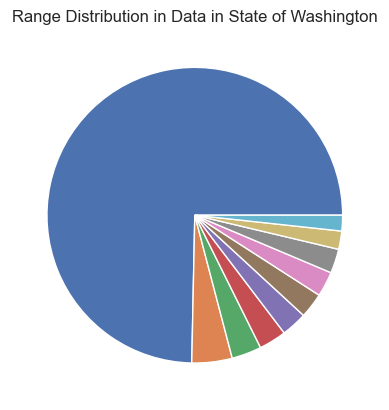

In [ ]:
plt.title("Range Distribution in Data in State of Washington")
plt.pie(vehicle_df[vehicle_df['State']=='WA']['Electric Range'].value_counts()[:10]);

In [ ]:
vehicle_df['Postal Code'].unique()

array([98275., 98901., 98346., 98367., 98208., 98107., 98576., 98033.,
       98506., 98903., 98310., 98312., 98092., 98056., 98012., 98109.,
       98011., 98277., 98204., 98115., 98110., 98004., 98133., 98902.,
       98005., 98103., 98034., 98030., 98512., 98502., 98029., 98144.,
       98055., 98501., 98087., 98177., 98272., 98311., 98942., 98292.,
       98290., 98052., 98008., 98021., 98201., 98383., 98908., 98112.,
       98597., 98075., 98370., 98178., 98503., 98851., 98253., 98101.,
       98513., 98366., 98155., 98936., 98007., 98037., 98038., 98027.,
       98036., 98026., 98074., 98392., 98121., 98122., 98028., 98019.,
       98166., 98258., 98119., 98951., 98274., 98847., 98229., 98198.,
       98117., 98199., 98032., 98126., 98146., 98136., 98108., 98118.,
       98023., 98203., 98072., 98125., 98516., 98270., 98040., 98106.,
       98039., 98148., 98102., 98296., 98338., 98020., 99362.,    nan,
       98925., 99114., 98249., 80104., 98922., 85338., 98816., 84074.,
      

In [ ]:
type(range(1,20))

range

In [ ]:
vehicle_df[vehicle_df['Electric Range']==0]['Electric Range'].value_counts()

Electric Range
0    109401
Name: count, dtype: int64

In [ ]:
bev_vehicles_df =vehicle_df[vehicle_df['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']

In [ ]:
bev_vehicles_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,156954.000000,156956.000000,156956.000000,156956.000000,156640.000000,1.569560e+05,1.569540e+05
mean,98171.960472,2021.111987,59.673316,804.263615,29.506231,2.267260e+08,5.297965e+10
std,2246.471416,2.792161,99.028774,7192.826562,14.956766,7.190321e+07,1.560956e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,1.028600e+04,1.001020e+09
25%,98042.000000,2020.000000,0.000000,0.000000,18.000000,1.937003e+08,5.303301e+10
50%,98118.000000,2022.000000,0.000000,0.000000,34.000000,2.364439e+08,5.303303e+10
75%,98365.000000,2023.000000,84.000000,0.000000,43.000000,2.608380e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,110950.000000,49.000000,4.791150e+08,5.602100e+10


In [ ]:
phev_vehicles_df =vehicle_df[vehicle_df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']

In [ ]:
phev_vehicles_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,43090.000000,43092.000000,43092.000000,43092.000000,42966.000000,4.309200e+04,4.309000e+04
mean,98191.540775,2019.994454,30.946301,1469.457556,27.089699,2.247426e+08,5.296014e+10
std,2983.364662,3.502025,15.127143,9902.380424,14.573137,7.606571e+07,1.758713e+09
min,2842.000000,2010.000000,6.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98072.000000,2017.000000,21.000000,0.000000,13.000000,1.815050e+08,5.303301e+10
50%,98188.000000,2021.000000,30.000000,0.000000,28.000000,2.353908e+08,5.303303e+10
75%,98467.000000,2023.000000,38.000000,0.000000,41.000000,2.614158e+08,5.305307e+10
max,99403.000000,2025.000000,153.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


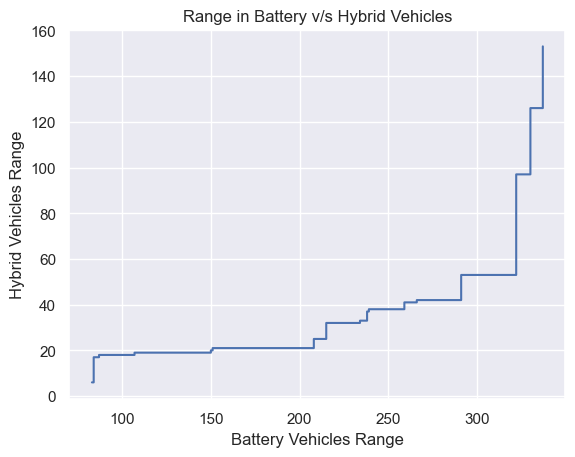

In [ ]:
plt.title("Range in Battery v/s Hybrid Vehicles")
plt.xlabel('Battery Vehicles Range')
plt.ylabel('Hybrid Vehicles Range')
plt.plot(bev_vehicles_df['Electric Range'].sort_values(ascending=False)[:43092],phev_vehicles_df['Electric Range'].sort_values(ascending=False)[:43092]);

In [ ]:
bev_vehicles_df[bev_vehicles_df['Make']=='TESLA'].count()
# All of tesla vehicles comes under the caterogroy of bev 

VIN (1-10)                                           88083
County                                               88081
City                                                 88081
State                                                88083
Postal Code                                          88081
Model Year                                           88083
Make                                                 88083
Model                                                88083
Electric Vehicle Type                                88083
Clean Alternative Fuel Vehicle (CAFV) Eligibility    88083
Electric Range                                       88083
Base MSRP                                            88083
Legislative District                                 87860
DOL Vehicle ID                                       88083
Vehicle Location                                     88081
Electric Utility                                     88081
2020 Census Tract                                    880

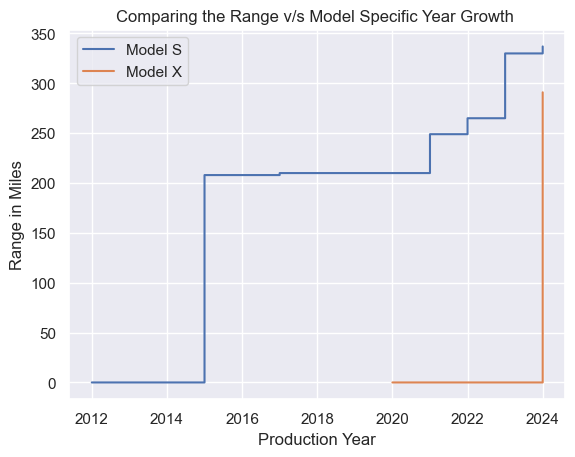

In [ ]:
plt.title("Comparing the Range v/s Model Specific Year Growth ")
plt.xlabel("Production Year")
plt.ylabel("Range in Miles")
plt.plot(bev_vehicles_df[bev_vehicles_df['Model']=='MODEL S']['Model Year'].sort_values(),bev_vehicles_df[bev_vehicles_df['Model']=='MODEL S']['Electric Range'].sort_values())
plt.plot(bev_vehicles_df[bev_vehicles_df['Model']=='MODEL Y']['Model Year'].sort_values(),bev_vehicles_df[bev_vehicles_df['Model']=='MODEL Y']['Electric Range'].sort_values())
plt.legend(['Model S','Model X']);

In [ ]:
(bev_vehicles_df[bev_vehicles_df['Model']=='MODEL S']['Electric Range']).sort_values()

106378      0
106451      0
106453      0
441         0
548         0
         ... 
64839     337
64916     337
53969     337
109126    337
108959    337
Name: Electric Range, Length: 7868, dtype: int64

### Notice that all the Places where the Range is Zero 0 are creating unusual behaviour in data visualtization

##### Removing all the Rows with Zero Range or not Recorded Range

In [ ]:
drop_condtion=bev_vehicles_df['Electric Range']==0
non_zero_bev_df=bev_vehicles_df.drop(bev_vehicles_df.loc[drop_condtion,'Electric Range'].index,axis=0)

In [ ]:
non_zero_bev_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
5,5YJYGDEF8L,King,Seattle,WA,98107.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,36.0,112984833,POINT (-122.3788863 47.6702397),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
7,JN1AZ0CPXC,King,Kirkland,WA,98033.0,2012,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,45.0,258649240,POINT (-122.1925969 47.676241),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,JN1AZ0CP7B,King,Kirkland,WA,98033.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,45.0,180120202,POINT (-122.1925969 47.676241),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200024,5YJ3E1EB8J,Pierce,Tacoma,WA,98407.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,27.0,111524199,POINT (-122.50352 47.282006),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
200027,1N4BZ0CPXH,Spokane,Spokane,WA,99203.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,6.0,192839531,POINT (-117.402924 47.63041),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200035,1N4AZ0CP5F,San Juan,Eastsound,WA,98245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,40.0,136786163,POINT (-122.9129975 48.6692106),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10
200038,5YJ3E1EB0L,King,Issaquah,WA,98006.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,41.0,2107171,POINT (-122.144149 47.560742),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


#### Using `loc` we can filter out the data set to be removed and extract sereis 
1. `df.loc[drop_condition]` --> Gives us the dataframe 
2. `df.loc[drop_condition,cloumn_name]` --> Gives us the Series for that particular column 
3. `df.loc[drop_condition,cloumn_name].index`we need to pass the list of indices we can use the index label attribute 

In [ ]:
type(bev_vehicles_df.loc[drop_condtion,'Electric Range'])

pandas.core.series.Series

#### Plotting Graph with Non Zero Range Values which is more accurate as compared to with zero values  

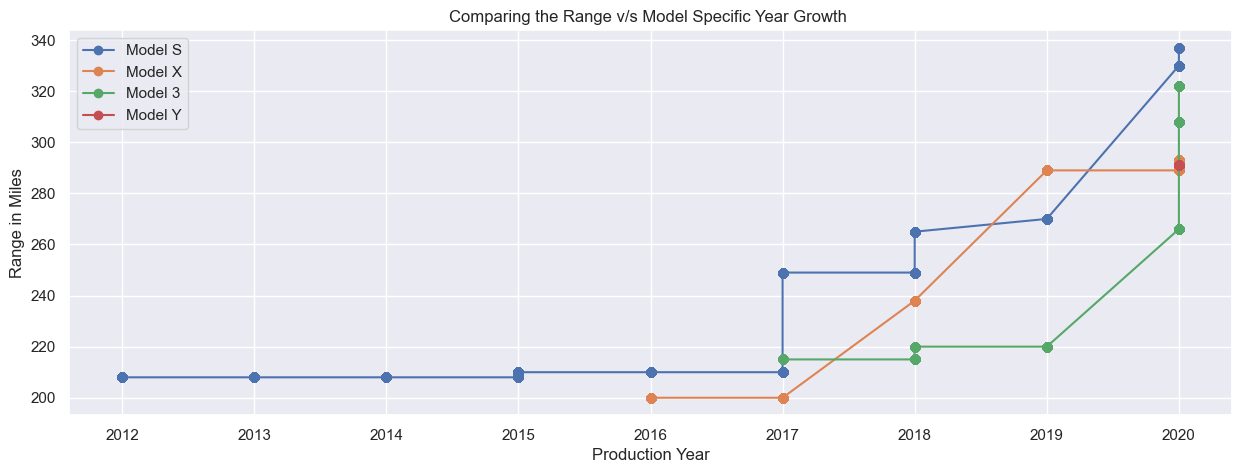

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.title("Comparing the Range v/s Model Specific Year Growth ")
plt.xlabel("Production Year")
plt.ylabel("Range in Miles")
plt.plot(non_zero_bev_df[non_zero_bev_df['Model']=='MODEL S']['Model Year'].sort_values(),non_zero_bev_df[non_zero_bev_df['Model']=='MODEL S']['Electric Range'].sort_values(),marker='o',ls='-')
plt.plot(non_zero_bev_df[non_zero_bev_df['Model']=='MODEL X']['Model Year'].sort_values(),non_zero_bev_df[non_zero_bev_df['Model']=='MODEL X']['Electric Range'].sort_values(),marker='o'),
plt.plot(non_zero_bev_df[non_zero_bev_df['Model']=='MODEL 3']['Model Year'].sort_values(),non_zero_bev_df[non_zero_bev_df['Model']=='MODEL 3']['Electric Range'].sort_values(),marker='o')
plt.plot(non_zero_bev_df[non_zero_bev_df['Model']=='MODEL Y']['Model Year'].sort_values(),non_zero_bev_df[non_zero_bev_df['Model']=='MODEL Y']['Electric Range'].sort_values(),marker='o')
plt.legend(['Model S','Model X','Model 3','Model Y']);

In [ ]:
non_zero_bev_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,47553.000000,47555.000000,47555.000000,47555.000000,47447.000000,4.755500e+04,4.755300e+04
mean,98177.141085,2017.536621,196.952686,2654.484281,29.918119,2.126443e+08,5.297630e+10
std,2328.005283,2.337394,73.003570,12878.235918,14.620234,1.189599e+08,1.590906e+09
min,3804.000000,1997.000000,29.000000,0.000000,1.000000,1.028600e+04,1.081042e+09
25%,98052.000000,2016.000000,150.000000,0.000000,19.000000,1.274542e+08,5.303301e+10
50%,98125.000000,2018.000000,215.000000,0.000000,34.000000,1.975148e+08,5.303303e+10
75%,98370.000000,2019.000000,238.000000,0.000000,43.000000,2.636676e+08,5.305307e+10
max,99403.000000,2021.000000,337.000000,110950.000000,49.000000,4.791150e+08,5.500902e+10


In [ ]:
vehicle_df['State'].describe()

count     200048
unique        45
top           WA
freq      199606
Name: State, dtype: object

#### Majority of our Observations are from State of Washington

In [ ]:
wash_df=vehicle_df[vehicle_df['State']=='WA']

In [ ]:
wash_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


#### Replacing `Clean Alternative Fuel Eligibility` with Shorter String Value

In [ ]:
new_label_dic={
	"Clean Alternative Fuel Vehicle Eligible" : "Clean EV",
	"Not eligible due to low battery range" : "Non Eligible",
	"Eligibility unknown as battery range has not been researched":"Not Known"	
}
new_series=wash_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(new_label_dic)

In [ ]:
wash_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=new_series

In [ ]:
wash_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean EV,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Non Eligible,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean EV,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Non Eligible,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean EV,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


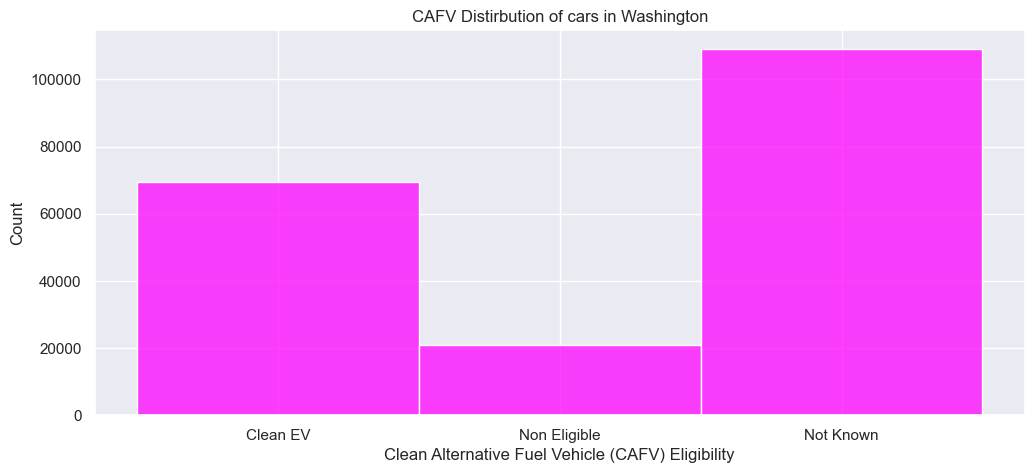

In [ ]:
plt.figure(figsize=(12,5))
plt.title("CAFV Distirbution of cars in Washington")
sns.histplot(wash_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],color='magenta');

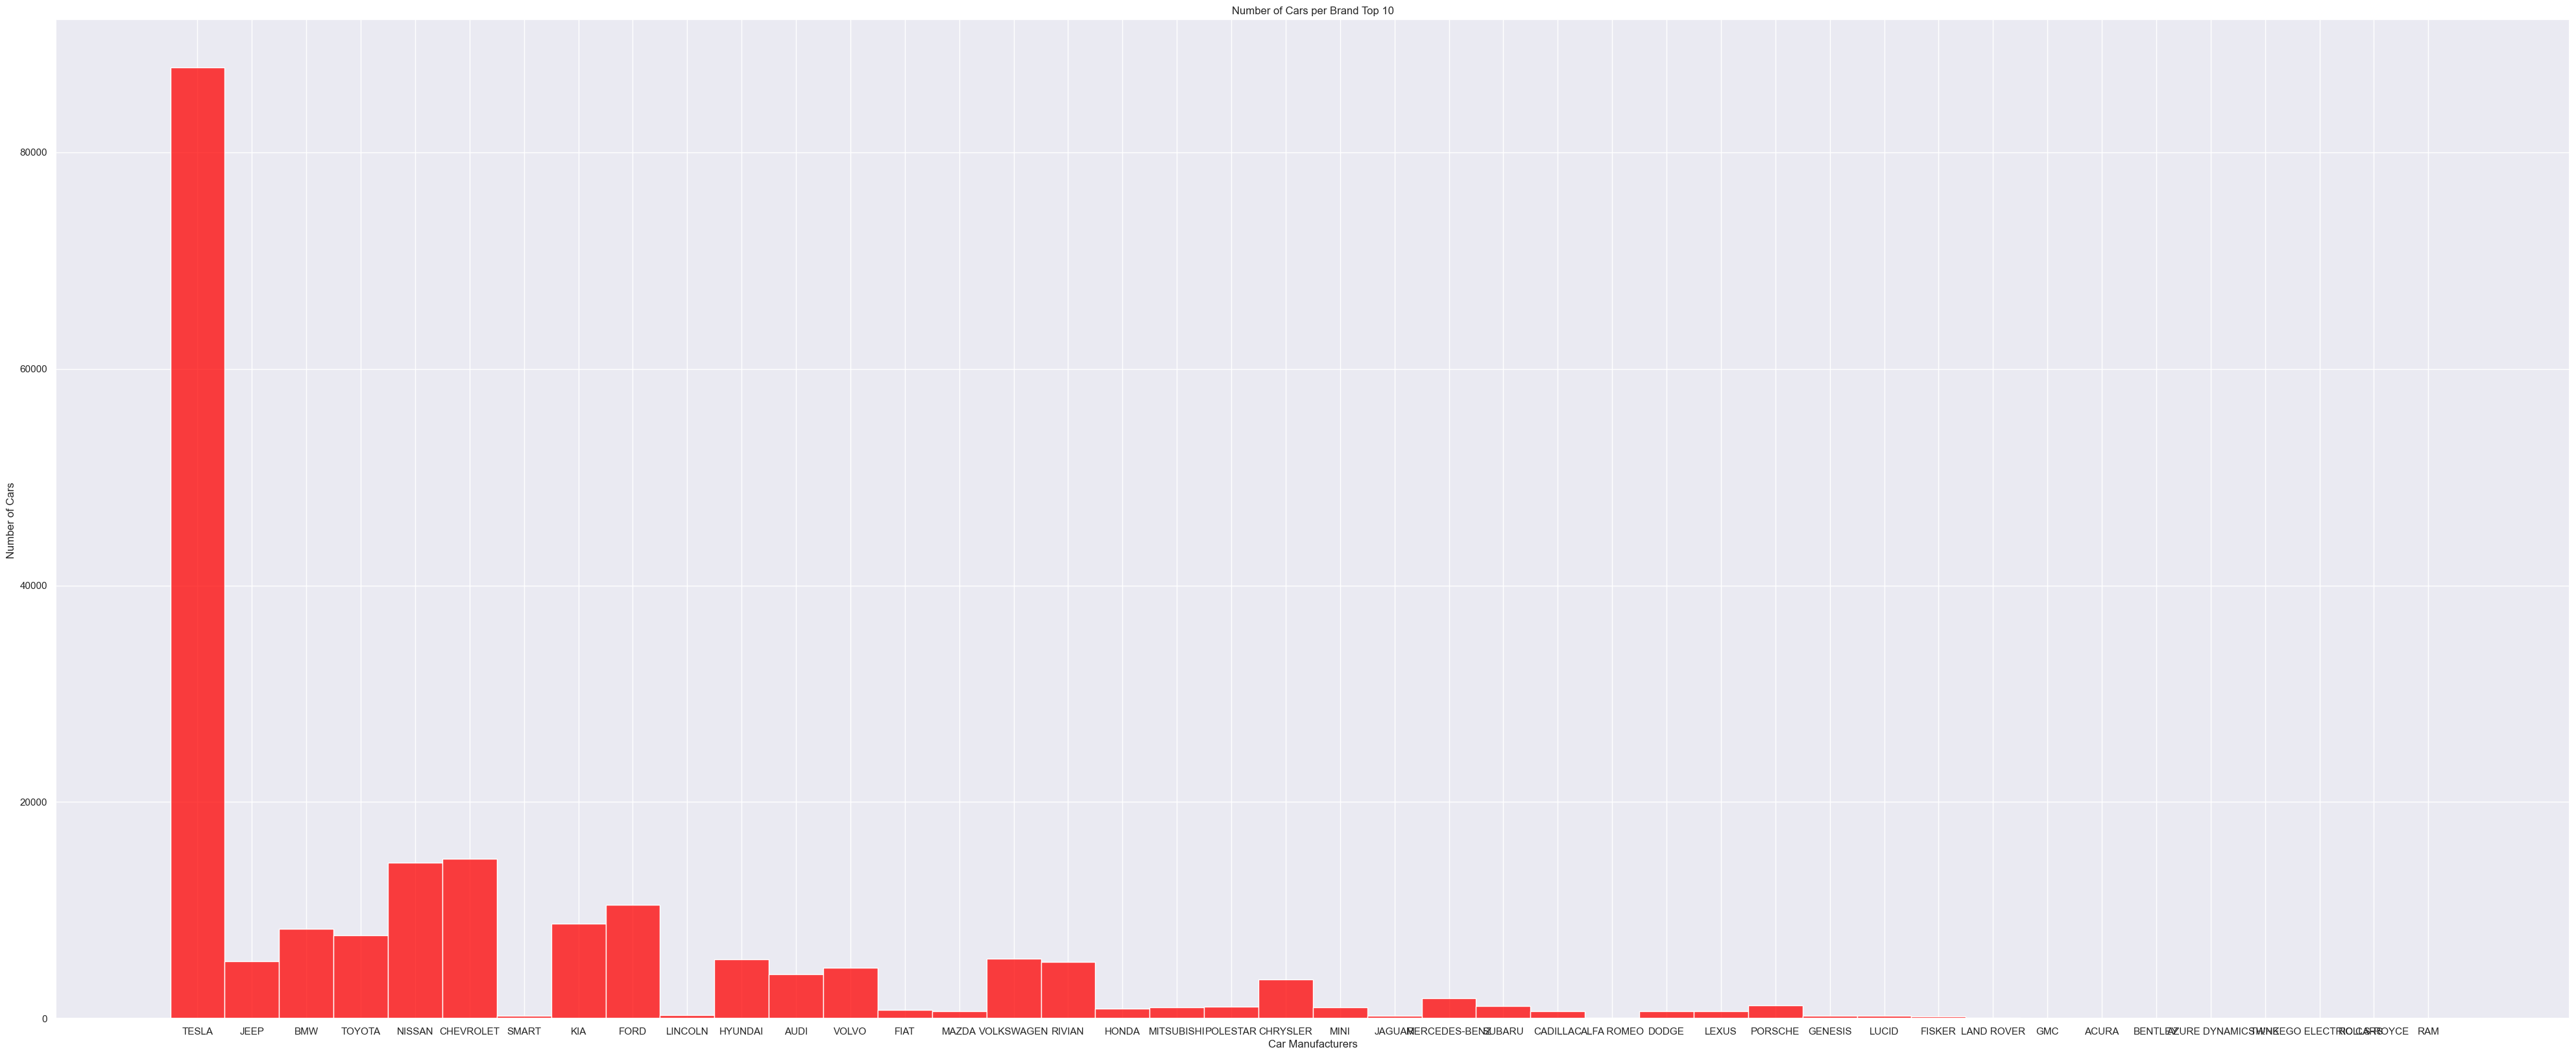

In [ ]:
plt.figure(figsize=(50,20))
plt.title("Number of Cars per Brand Top 10")
plt.ylabel("Number of Cars ")
plt.xlabel("Car Manufacturers")
sns.histplot(wash_df['Make'],color='red',element="bars");

***Incase of `wash_df` majority of the cars belong to TESLA brand , other are also in significant numbers***

#### To check the relation between `CAFV` eligibility criteria and Electric range 

In [ ]:
wash_df.loc[:,['Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']]

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,Clean EV,270
1,Non Eligible,21
2,Clean EV,153
3,Non Eligible,25
4,Clean EV,30
...,...,...
200043,Clean EV,42
200044,Not Known,0
200045,Not Known,0
200046,Clean EV,38


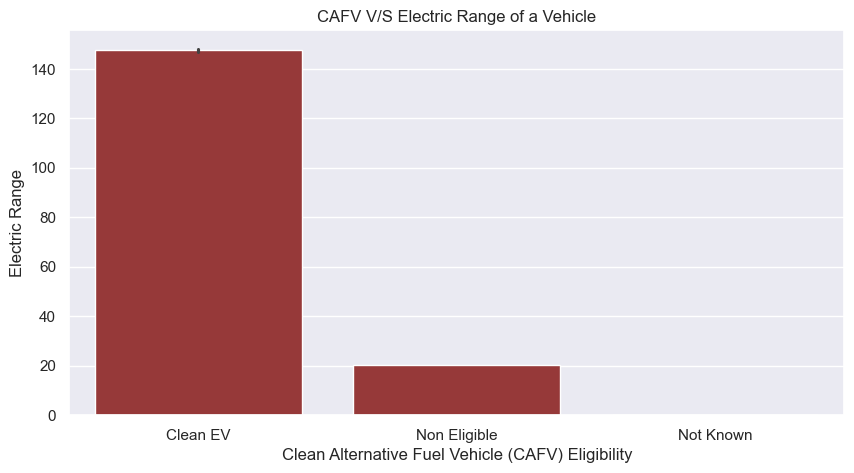

In [ ]:
plt.figure(figsize=(10,5))
plt.title("CAFV V/S Electric Range of a Vehicle")
sns.barplot(x=wash_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],y=wash_df['Electric Range'],color='brown');

#### It is very clear from this that All the `non eligible` Vehicles have ev range of 20 or less . This information can also be useful to fill clean ev ranges 

In [ ]:
wash_df[wash_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not Known'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109193.000000,109193.000000,109193.0,109193.0,109193.000000,1.091930e+05,1.091930e+05
mean,98242.978332,2022.666847,0.0,0.0,29.327255,2.328689e+08,5.303990e+10
std,293.733278,0.915312,0.0,0.0,15.097224,3.379458e+07,1.587114e+07
min,98001.000000,2008.000000,0.0,0.0,1.000000,1.028289e+08,5.300195e+10
25%,98040.000000,2022.000000,0.0,0.0,18.000000,2.148980e+08,5.303301e+10
50%,98117.000000,2023.000000,0.0,0.0,33.000000,2.416073e+08,5.303303e+10
75%,98346.000000,2023.000000,0.0,0.0,43.000000,2.606404e+08,5.305307e+10
max,99403.000000,2025.000000,0.0,0.0,49.000000,3.453611e+08,5.307794e+10


#### For vehicles CAFV is `notKnown` have range assigned as `EV range=0` in df

#### Focusing on Tesla 

In [ ]:
wash_df[wash_df['Make']=='TESLA'].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean EV,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJYGDEF8L,King,Seattle,WA,98107.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean EV,291,0,36.0,112984833,POINT (-122.3788863 47.6702397),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
13,5YJ3E1EA3K,King,Auburn,WA,98092.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean EV,220,0,47.0,180476327,POINT (-122.1550193 47.2884536),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
19,5YJ3E1EA4K,Snohomish,Everett,WA,98204.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean EV,220,0,21.0,478330212,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
20,7SAYGAEE2P,King,Seattle,WA,98115.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Not Known,0,0,46.0,257782626,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


#### Here it is clearly visible That range of all the models after 2020 is not calculated and hence it has not been assigned any `CAFV` Category 

***As per the above graph of range improvements over years it can be clearly concluded that for a given tesla model in previous year in `Green EV Category` it will mostly continue to be under `Green EV` Category*** 

**However it increasingly becomes important for us to not be over predictive ::**
1. We can only predict the Possible categories for vehicles (tesla here ) whose range has not beem recorded into 'Clean EV','Non Eligible',etc
2. We can't fill the values of range of not known category by mean or any other parameter 

In [ ]:
wash_df[wash_df['Make']=='TESLA'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,87860.000000,87860.000000,87860.000000,87860.000000,87860.000000,8.786000e+04,8.786000e+04
mean,98234.415331,2021.275222,69.875871,1221.860346,29.657375,2.256475e+08,5.303958e+10
std,297.861503,2.377405,111.305267,9223.442973,15.391501,7.647960e+07,1.571081e+07
min,98001.000000,2008.000000,0.000000,0.000000,1.000000,2.462900e+04,5.300195e+10
25%,98037.000000,2020.000000,0.000000,0.000000,18.000000,1.866131e+08,5.303302e+10
50%,98109.000000,2022.000000,0.000000,0.000000,34.000000,2.329683e+08,5.303303e+10
75%,98332.000000,2023.000000,208.000000,0.000000,43.000000,2.603868e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,110950.000000,49.000000,4.791150e+08,5.307794e+10


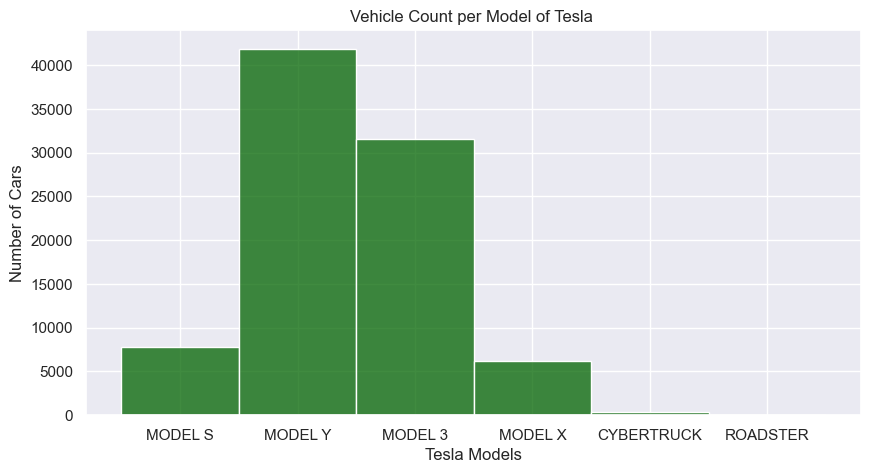

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Vehicle Count per Model of Tesla ")
plt.xlabel("Tesla Models")
plt.ylabel("Number of Cars")
sns.histplot(wash_df[wash_df['Make']=='TESLA']['Model'],color='darkgreen');

#### It is clearly visible that there are `zero` or almost `negligible` models of Roadster and maximum no of cars from tesla are `Model Y`
1. Roadsters are less as they have been produced before 2010 and second generation is yet to come 

**Before correction of Values in Type cafv ev**

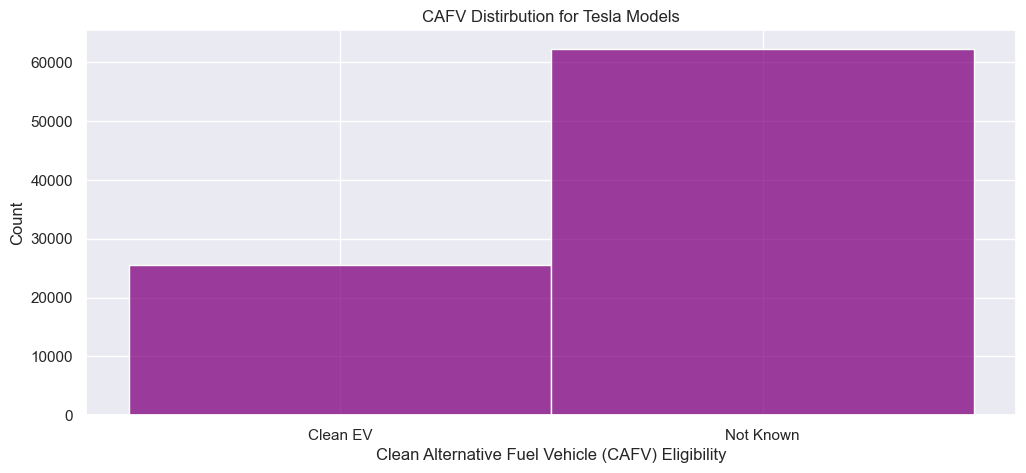

In [ ]:
plt.figure(figsize=(12,5))
plt.title("CAFV Distirbution for Tesla Models")
sns.histplot(wash_df[wash_df['Make']=='TESLA']['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],color='purple');

In [ ]:
# (wash_df[wash_df['Make']=='TESLA']).loc[:,'Clean Alternative Fuel Vehicle (CAFV) Eligibility']='Clean EV'